<a href="https://colab.research.google.com/github/PeinHatake/GAN/blob/master/DCGAN_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP CONVOLUTION GANs**

Tài liệu: https://arxiv.org/pdf/1511.06434.pdf

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0) 


def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

***Generator***

In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim=10, im_chan=1, hidden_dim=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim
        self.gen = nn.Sequential(
            self.make_gen_block(z_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True),
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(),
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
                nn.Tanh(),
            )

    def unsqueeze_noise(self, noise):
        return noise.view(len(noise), self.z_dim, 1, 1)

    def forward(self, noise):
        x = self.unsqueeze_noise(noise)
        return self.gen(x)

def get_noise(n_samples, z_dim, device='cpu'):
    return torch.randn(n_samples, z_dim, device=device)

***Discriminator***

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, im_chan=1, hidden_dim=16):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels,output_channels,kernel_size,stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2),
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels,output_channels,kernel_size,stride),
            )

    def forward(self, image):
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred), -1)

***Dataloader***

In [ ]:
criterion = nn.BCEWithLogitsLoss()
z_dim = 64
display_step = 500
batch_size = 128

lr = 0.0002


beta_1 = 0.5 
beta_2 = 0.999


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

dataloader = DataLoader(
    MNIST('.', download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True)

In [ ]:
gen = Generator(z_dim)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc = Discriminator()
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))


def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)

***Training***

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator loss: 2.4493049988746645, discriminator loss: 0.12090002603828899


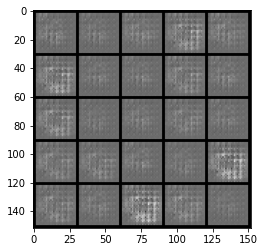

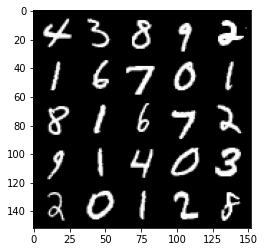

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator loss: 2.2374526864588278, discriminator loss: 0.3070941829569639


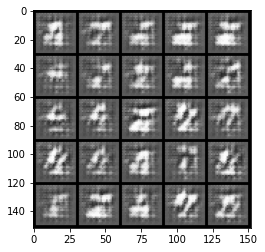

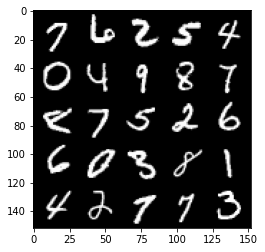

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator loss: 1.443617699995635, discriminator loss: 0.4628444147706032


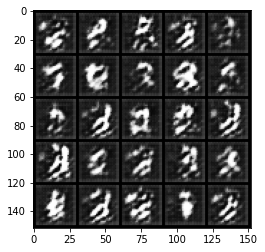

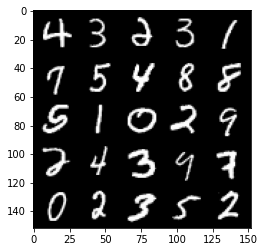

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator loss: 1.1127165906727314, discriminator loss: 0.5304430995583536


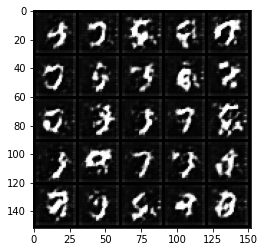

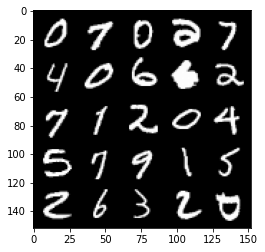

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator loss: 0.9563818841278555, discriminator loss: 0.5718713790774348


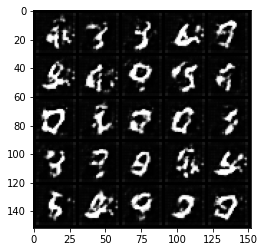

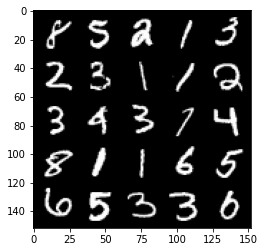

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator loss: 0.8548775036931043, discriminator loss: 0.6097151088714603


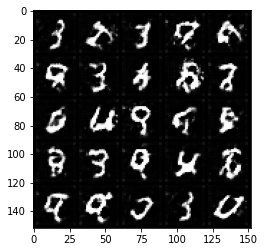

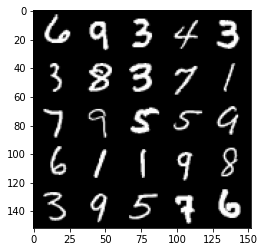

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator loss: 0.8095020801424972, discriminator loss: 0.6396825094223023


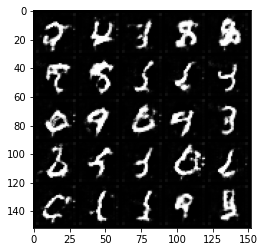

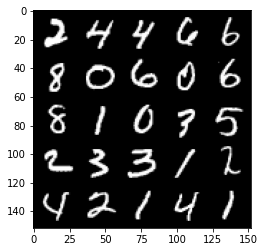

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator loss: 0.80207367259264, discriminator loss: 0.6478589798212053


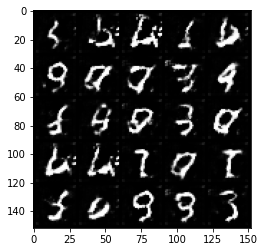

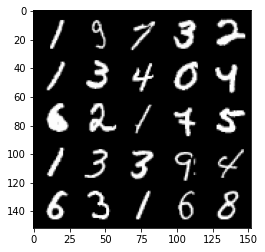

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator loss: 0.800845395803452, discriminator loss: 0.6531378813982012


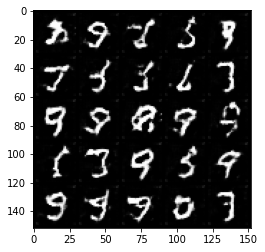

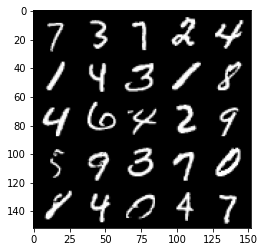

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 0.7874426566362384, discriminator loss: 0.6589428187608719


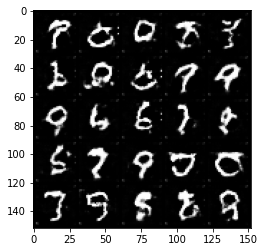

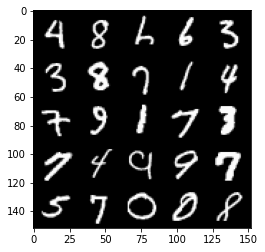

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator loss: 0.7864013451039793, discriminator loss: 0.6621744894981382


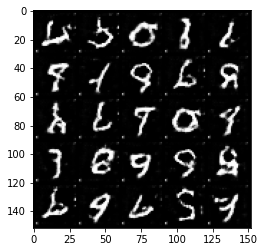

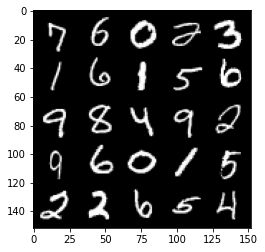

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator loss: 0.7754063351750369, discriminator loss: 0.6671043503284447


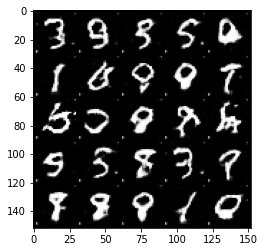

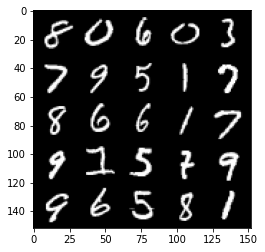

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator loss: 0.7682431013584132, discriminator loss: 0.6710120661258696


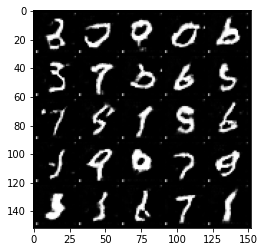

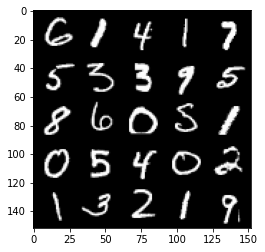

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator loss: 0.761166312873363, discriminator loss: 0.675404268026352


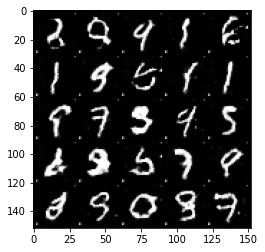

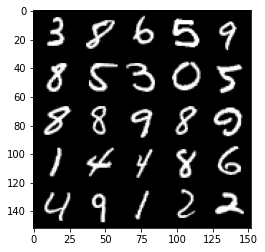

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator loss: 0.7556215188503268, discriminator loss: 0.6795632425546644


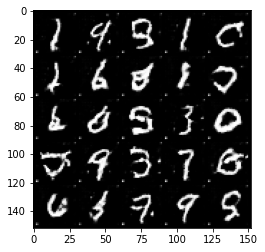

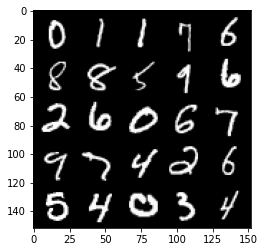

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator loss: 0.752992131829261, discriminator loss: 0.6790653177499776


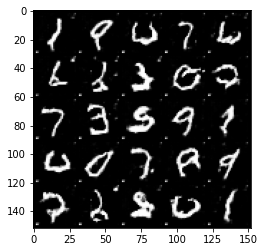

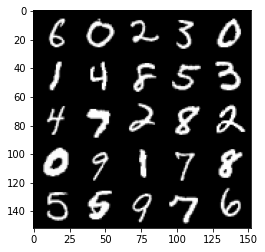

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator loss: 0.7470591105818741, discriminator loss: 0.6813538483381276


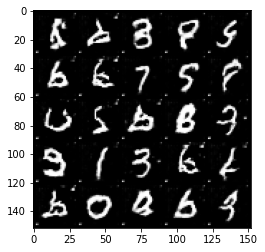

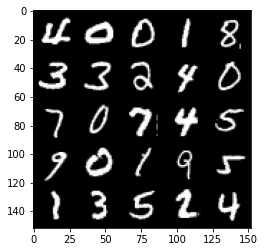

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator loss: 0.7431176021099095, discriminator loss: 0.6821988313198083


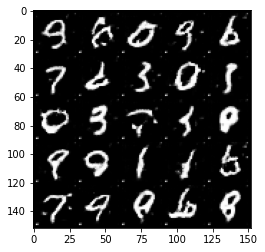

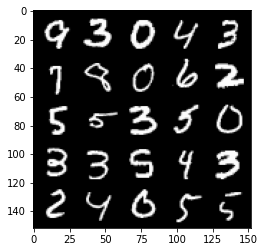

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator loss: 0.7407169987559319, discriminator loss: 0.6835472261905672


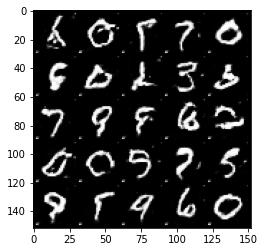

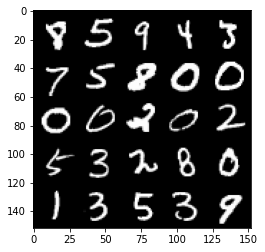

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 0.7377000784277918, discriminator loss: 0.6862008204460138


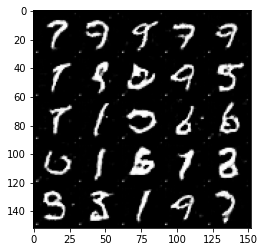

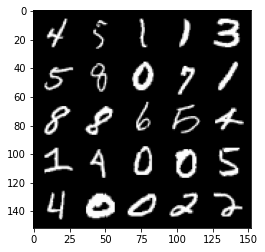

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator loss: 0.7311169273853307, discriminator loss: 0.6901313352584849


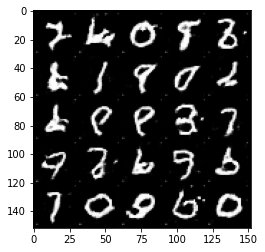

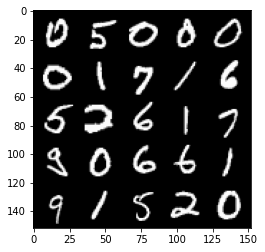

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator loss: 0.7280186282396324, discriminator loss: 0.6908837867975236


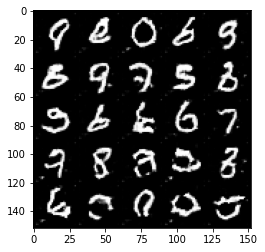

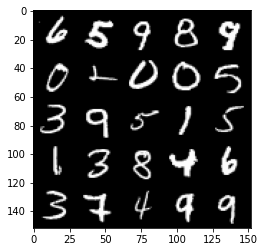

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator loss: 0.7244075474143031, discriminator loss: 0.6916879434585571


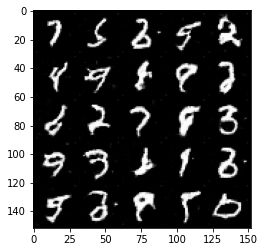

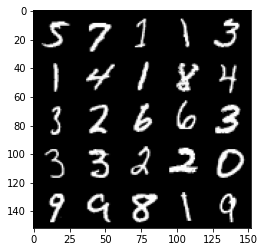

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator loss: 0.7196304551362983, discriminator loss: 0.6927057180404662


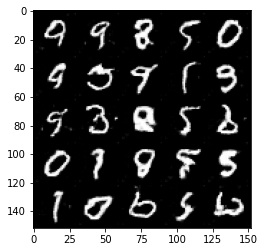

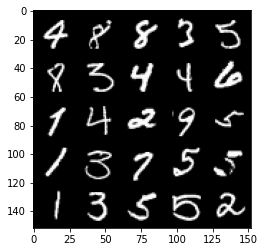

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator loss: 0.715958834886551, discriminator loss: 0.6956467635631562


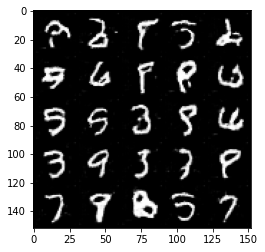

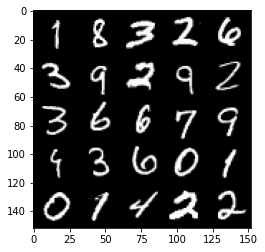

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator loss: 0.7148098706603045, discriminator loss: 0.6952418907880782


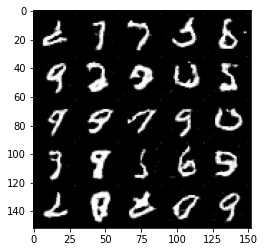

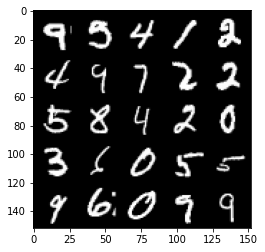

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13500: Generator loss: 0.714554677963257, discriminator loss: 0.6965416897535324


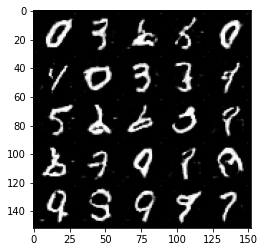

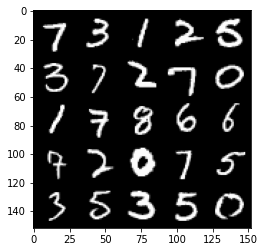

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14000: Generator loss: 0.7114672177433967, discriminator loss: 0.698336140990257


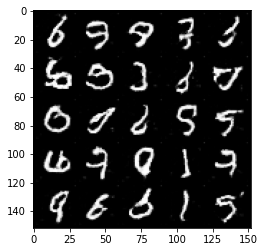

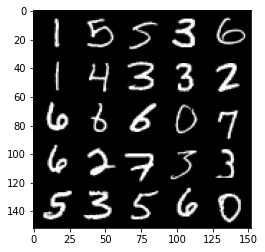

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14500: Generator loss: 0.7077637206315992, discriminator loss: 0.6966161736249918


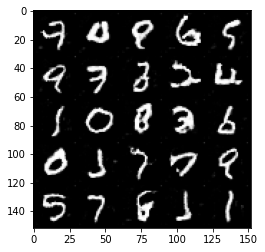

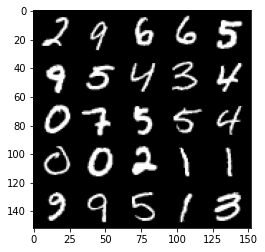

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15000: Generator loss: 0.7103985698223122, discriminator loss: 0.6979447327852251


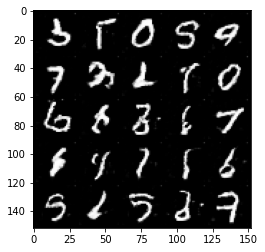

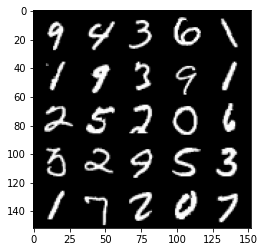

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15500: Generator loss: 0.7091933944225309, discriminator loss: 0.6978304630517957


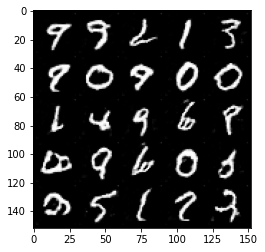

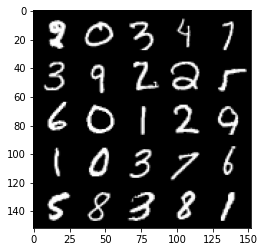

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16000: Generator loss: 0.7065798777341837, discriminator loss: 0.6973892676830278


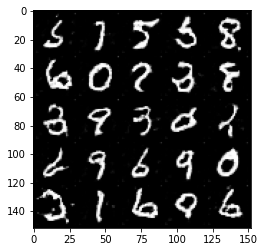

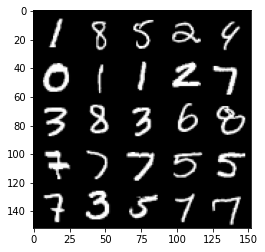

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16500: Generator loss: 0.7074981071352953, discriminator loss: 0.6976695756912233


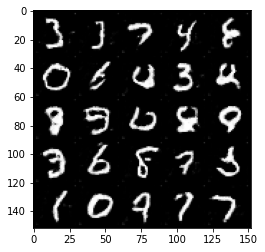

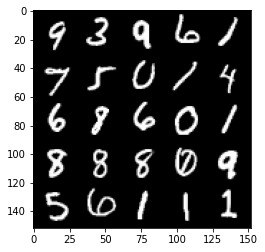

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17000: Generator loss: 0.7053555265069008, discriminator loss: 0.697223565101624


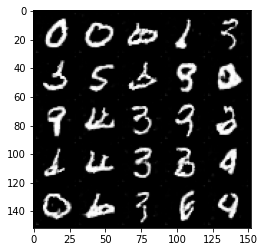

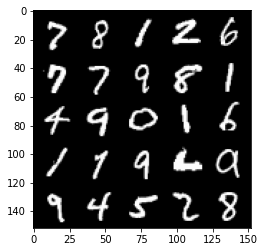

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17500: Generator loss: 0.7043527510166168, discriminator loss: 0.6974613361358638


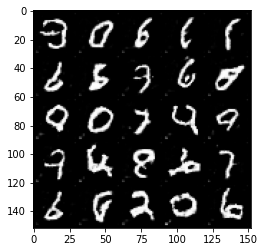

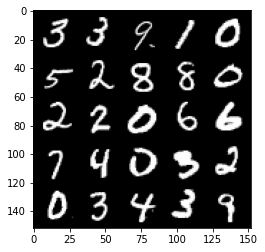

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18000: Generator loss: 0.7022170917391773, discriminator loss: 0.6974969060420991


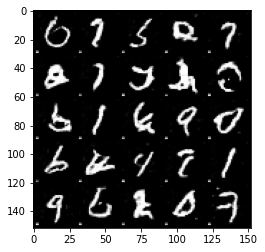

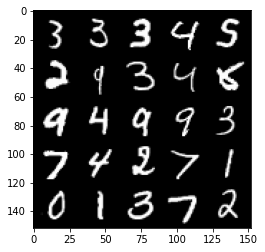

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18500: Generator loss: 0.7012312652468677, discriminator loss: 0.697564186096191


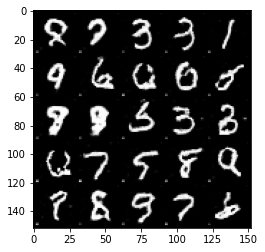

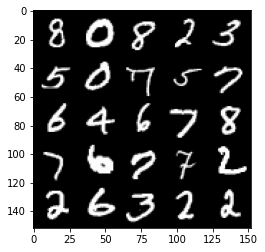

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19000: Generator loss: 0.6997129094600677, discriminator loss: 0.6974090930223464


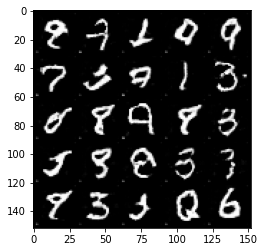

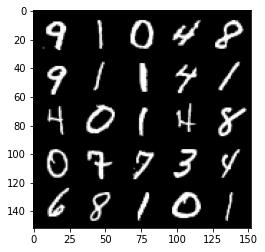

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19500: Generator loss: 0.7019651784300808, discriminator loss: 0.6976391934156424


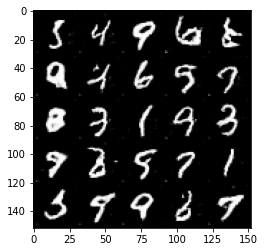

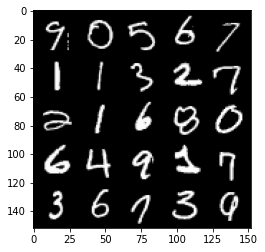

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20000: Generator loss: 0.7006315375566481, discriminator loss: 0.697160113334656


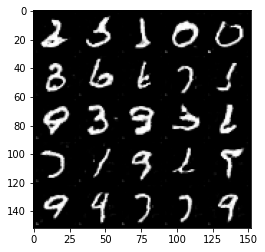

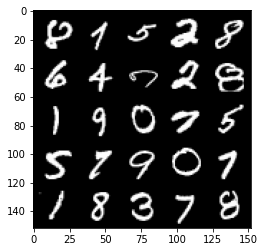

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20500: Generator loss: 0.7009024987220762, discriminator loss: 0.6968066546916959


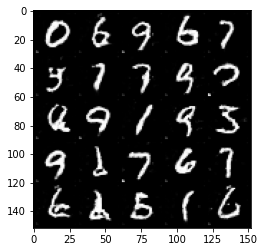

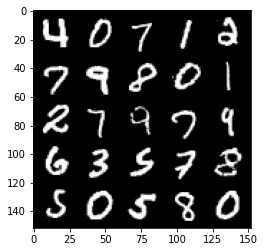

  0%|          | 0/469 [00:00<?, ?it/s]

Step 21000: Generator loss: 0.7000392114520066, discriminator loss: 0.69700090777874


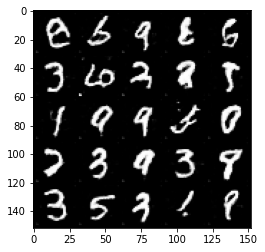

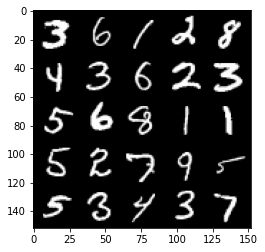

  0%|          | 0/469 [00:00<?, ?it/s]

Step 21500: Generator loss: 0.6992481863498691, discriminator loss: 0.6967367652654658


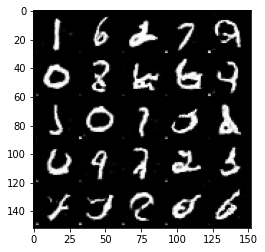

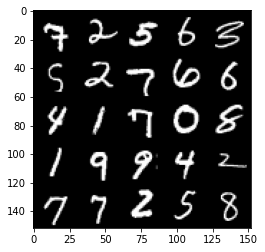

  0%|          | 0/469 [00:00<?, ?it/s]

Step 22000: Generator loss: 0.6970837357044218, discriminator loss: 0.6974057055711755


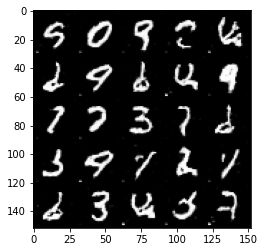

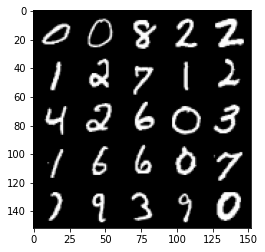

  0%|          | 0/469 [00:00<?, ?it/s]

Step 22500: Generator loss: 0.6979317389726641, discriminator loss: 0.696861408114433


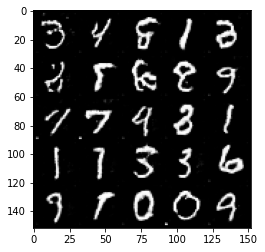

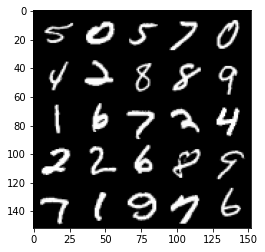

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 23000: Generator loss: 0.6987850984334945, discriminator loss: 0.6963012850284572


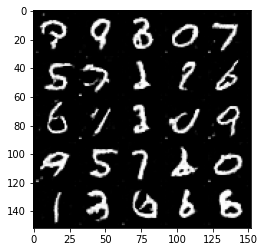

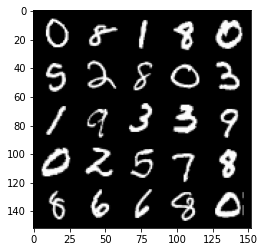

In [ ]:
n_epochs = 50
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
for epoch in range(n_epochs):
    # Dataloader returns the batches
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)
        

        ## Update discriminator ##
        disc_opt.zero_grad()
        fake_noise = get_noise(cur_batch_size, z_dim)
        fake = gen(fake_noise)
        disc_fake_pred = disc(fake.detach())
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_pred = disc(real)
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
        disc_loss = (disc_fake_loss + disc_real_loss) / 2

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step
        # Update gradients
        disc_loss.backward(retain_graph=True)
        # Update optimizer
        disc_opt.step()

        ## Update generator ##
        gen_opt.zero_grad()
        fake_noise_2 = get_noise(cur_batch_size, z_dim)
        fake_2 = gen(fake_noise_2)
        disc_fake_pred = disc(fake_2)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ## Visualization code ##
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1